In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv 
import warnings
warnings.simplefilter('ignore')
#pd.set_option('display.max_rows', None)

In [148]:
car=pd.read_csv("C:/data/car_prices_replaced_with_black.csv")

In [149]:
car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558832,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558833,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [150]:
#droping all the null values that are present in the data as
#Duplicate entries can ruin the split between train and test sets .
len(car)

558836

In [151]:
car=car.drop_duplicates()
len(car)

558836

In [152]:
car.isnull().sum()/car.shape[0]*100

year             0.000000
make             1.843296
model            1.860832
trim             1.905926
body             2.361158
transmission    11.695202
vin              0.000000
state            0.000000
condition        2.110458
odometer         0.016821
color            0.134029
interior         0.134029
seller           0.000000
mmr              0.000000
sellingprice     0.000000
saledate         0.000000
dtype: float64

In [153]:
car[car.duplicated(['vin'])]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
7231,2005,Chevrolet,Equinox,LS,SUV,automatic,2cndl13f056137366,ca,NaN,125141.0,red,black,buena park honda,3550,3300,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
7463,2003,BMW,7 Series,745Li,Sedan,automatic,wbagn63403ds43612,ca,2.4,212596.0,white,black,prestige auto wholesale inc,1675,3300,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
18120,2007,GMC,Envoy,Denali,SUV,automatic,1gket63m672242776,va,3.5,119475.0,gray,gray,blue knob auto sales inc,7725,7400,Thu Dec 18 2014 09:05:00 GMT-0800 (PST)
19043,2007,Nissan,Pathfinder,SE,SUV,NaN,5n1ar18w77c615027,nj,NaN,1.0,gray,black,awn sales ltd,10600,2600,Wed Dec 17 2014 09:30:00 GMT-0800 (PST)
23612,2004,Acura,MDX,Base,SUV,NaN,2hnyd182x4h516719,il,NaN,1.0,NaN,NaN,silver auto sales inc,7100,1500,Thu Dec 18 2014 10:00:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558736,2009,Jeep,Wrangler,Unlimited Rubicon,suv,automatic,1j4ga69109l752295,nv,3.7,70423.0,white,black,millennium cars,23100,17500,Fri Jun 19 2015 05:00:00 GMT-0700 (PDT)
558737,2008,Ford,F-250 Super Duty,Lariat,crew cab,automatic,1ftsw21rx8ea22277,nv,3.3,125628.0,black,beige,bul connections llc,21000,18700,Fri Jun 19 2015 04:45:00 GMT-0700 (PDT)
558749,2007,Saturn,Aura,XE,sedan,automatic,1g8zs57n17f246542,ga,2.9,82083.0,black,beige,carworks inc,5450,5200,Tue Jun 23 2015 06:00:00 GMT-0700 (PDT)
558799,2012,Kia,Soul,Base,Wagon,manual,kndjt2a57c7424577,nv,2.8,53607.0,silver,black,unique autos,7825,8000,Fri Jul 03 2015 09:00:00 GMT-0700 (PDT)


In [154]:
car=car.drop_duplicates(['vin'])

In [155]:
car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558832,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558833,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [156]:
car=car.dropna(subset=['make'])

In [157]:
car=car.dropna(subset=['model','trim','body','color','interior'])

In [158]:
car['body'].unique().shape

(85,)

In [159]:
car['body']=car['body'].str.lower()

In [160]:
car['body'].unique().shape

(45,)

In [161]:
car['make'].unique().shape

(53,)

In [162]:
car['make']=car['make'].str.lower()

In [163]:
car['make'].unique().shape

(53,)

In [164]:
car['trim'].unique().shape

(1527,)

In [165]:
car['trim']=car['trim'].str.lower()

In [166]:
car['trim'].unique().shape

(1508,)

In [167]:
car['model'].unique().shape

(776,)

In [168]:
car['model']=car['model'].str.lower()

In [169]:
car['model'].unique().shape

(772,)

In [170]:
car['seller'].unique().shape

(13833,)

In [171]:
car['seller']=car['seller'].str.lower()

In [172]:
car['seller'].unique().shape

(13833,)

In [173]:
car['interior'].value_counts()

black        252808
gray         170769
beige         57340
tan           42080
brown          8255
red            1288
silver         1037
blue           1029
off-white       480
purple          326
gold            310
white           240
green           222
burgundy        182
orange          132
yellow           20
Name: interior, dtype: int64

In [174]:
#car1=car.dropna(subset=['model','trim','body','color','interior','odometer'])

In [175]:
#car2=car.dropna(subset=['model','trim','body','color','interior','odometer'])

In [176]:
car

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,kia,k900,luxury,sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558832,2012,ram,2500,power wagon,crew cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558833,2012,bmw,x5,xdrive35d,suv,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2015,nissan,altima,2.5 s,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [177]:
#car['transmission'].value_counts()

In [178]:
#car['transmission'].fillna('automatic',inplace=True)

In [179]:
#car

In [180]:
car=car.drop(['vin'],axis=1)

<AxesSubplot:ylabel='Density'>

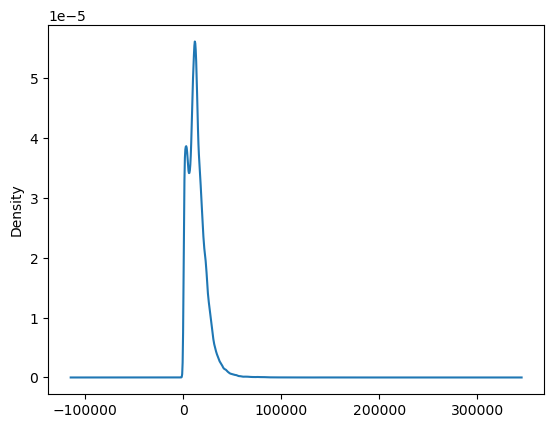

In [20]:
car['sellingprice'].plot.kde()

<AxesSubplot:ylabel='Density'>

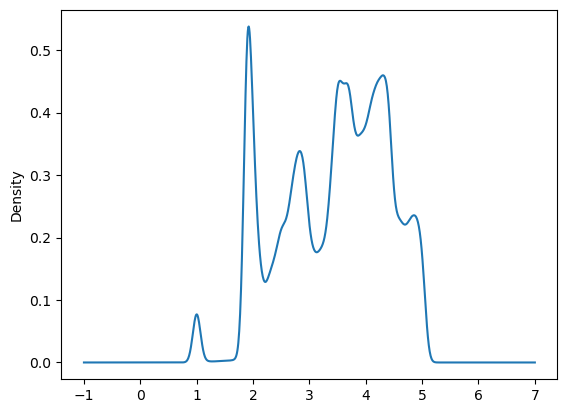

In [21]:
car['condition'].plot.kde()

<AxesSubplot:ylabel='Density'>

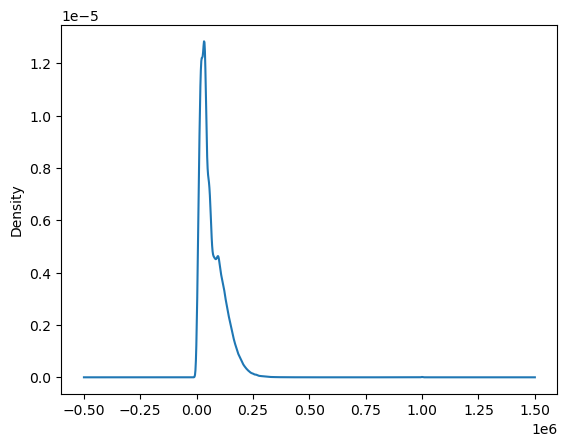

In [22]:
car['odometer'].plot.kde()

In [35]:
car.loc[car['make'].isnull()]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate


In [36]:
#now to replace the null values of the numerical  but before replacing them with the mean or median lets check the outlier

### outliers analysis

In [181]:
#car[car['sellingprice']<=1]

In [182]:
car[car['sellingprice']>185000]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
344905,2014,ford,escape,titanium,suv,automatic,mo,4.3,27802.0,green,tan,ford-lincoln dealer program,22800,230000,Wed Feb 25 2015 02:00:00 GMT-0800 (PST)


In [183]:
np.median(car['sellingprice'])

12200.0

In [184]:
car.loc[344905,'sellingprice']=np.median(car['sellingprice'])

In [185]:
categorical_columns = []
continous_columns = []
for x in car.columns:
  if car[x].dtypes == 'O':
    categorical_columns.append(x)
  else:
      continous_columns.append(x)

In [186]:
categorical_columns

['make',
 'model',
 'trim',
 'body',
 'transmission',
 'state',
 'color',
 'interior',
 'seller',
 'saledate']

In [187]:
continous_columns

['year', 'condition', 'odometer', 'mmr', 'sellingprice']

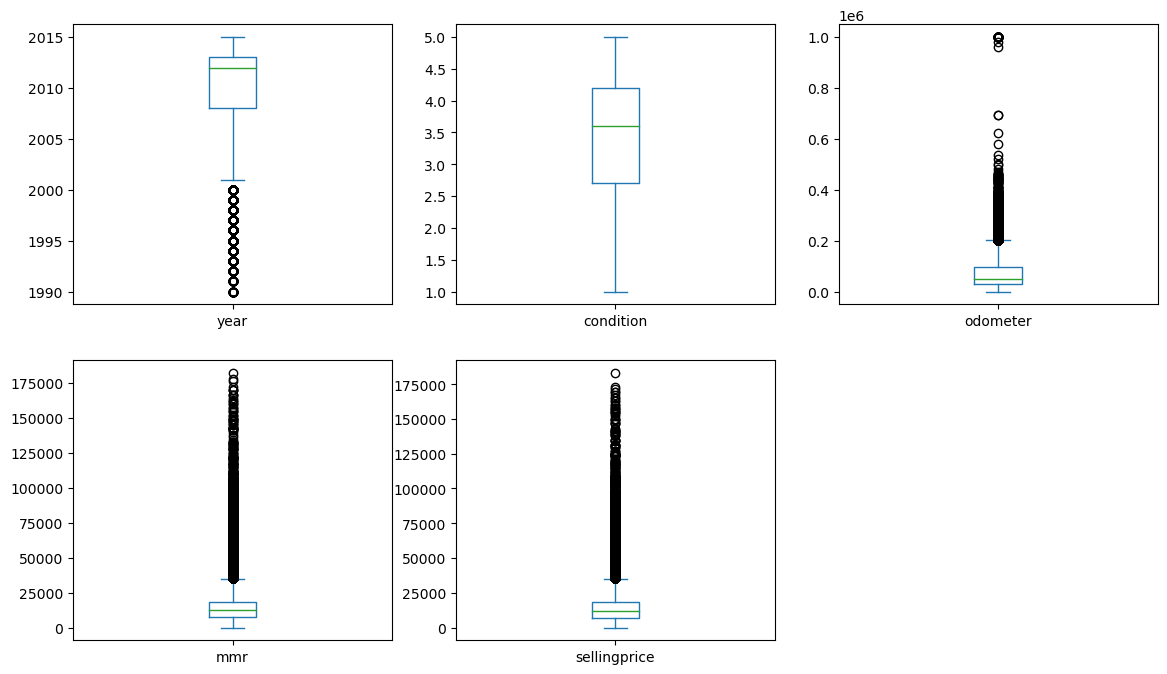

In [188]:
#let us detect the outliers that are present in the continous variable of the data 
car[continous_columns].plot(kind='box',subplots=True,layout=(2,3),figsize=(14,8))
plt.show()

As we can see that the odometer has some outliers that are very far away form the dataset and selling also has an outlier which is far away form the dataset

In [189]:
#odometer null values are filled with median instead of mean as the plot density function shows us that the data is skewed
car['odometer'] = car['odometer'].fillna(car['odometer'].median())

In [190]:
car['odometer'].median()

50947.0

In [191]:
#null values of the condition is replaced with mean looking at the plot density function
car['condition'] = car['condition'].fillna(car['condition'].mean())

In [192]:
#we define a function to detect the index value of the outliers 
def outliers(col,limit):
    index=[]
    index=car[car[col]>limit].index
    
    return index

In [193]:
ind=outliers('odometer',900000)
ind

Int64Index([   275,   4626,  13317,  13480,  13568,  20838,  38465,  39178,
             40121,  55492,  61824,  70798,  76882,  81661,  83882,  84086,
             96234, 103031, 117926, 117972, 118104, 135334, 136242, 163868,
            166054, 168800, 179448, 191690, 194973, 240950, 245595, 275351,
            279980, 290236, 321671, 321728, 321779, 323274, 338793, 347888,
            354485, 361178, 367686, 373462, 385365, 385721, 398167, 404788,
            406428, 409935, 416793, 417515, 418606, 451998, 452261, 452274,
            456535, 462014, 462299, 476592, 477254, 485267, 485604, 489832,
            490460, 501477, 513218, 541033],
           dtype='int64')

In [194]:
car[car['odometer']>900000]

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
275,2013,hyundai,elantra coupe,gs,elantra coupe,automatic,ca,1.000000,999999.0,blue,gray,hyundai motor finance,8025,2500,Tue Jan 27 2015 04:00:00 GMT-0800 (PST)
4626,2003,chevrolet,silverado 1500,ls,extended cab,automatic,ca,2.000000,999999.0,gray,gray,800 loan mart,1425,700,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
13317,2009,chevrolet,cobalt,lt,coupe,automatic,tx,3.436184,999999.0,white,gray,mei finance,3375,400,Thu Dec 18 2014 14:00:00 GMT-0800 (PST)
13480,2009,dodge,charger,base,sedan,automatic,il,1.000000,999999.0,black,gray,santander consumer,3850,1700,Tue Dec 23 2014 13:00:00 GMT-0800 (PST)
13568,2009,dodge,charger,base,sedan,automatic,tx,1.000000,999999.0,blue,black,santander consumer,4150,5500,Thu Jan 08 2015 14:10:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489832,2008,chrysler,300,touring,sedan,automatic,ca,2.700000,999999.0,silver,beige,chrysler capital,4325,1200,Tue Jun 02 2015 06:00:00 GMT-0700 (PDT)
490460,2002,ford,expedition,eddie bauer,suv,automatic,tx,2.000000,999999.0,black,gray,titlemax/leon valley tx1,600,600,Wed Jun 03 2015 03:20:00 GMT-0700 (PDT)
501477,2011,volkswagen,jetta,sel,sedan,NaN,tx,1.000000,999999.0,white,tan,santander consumer,8600,1100,Wed Jun 03 2015 05:30:00 GMT-0700 (PDT)
513218,2006,ford,taurus,sel,sedan,automatic,oh,1.900000,999999.0,gray,gray,car now acceptance co/columbus,175,400,Thu Jun 11 2015 02:00:00 GMT-0700 (PDT)


In [195]:
#the outliers of the odometer column is filled with the following value
value=round(np.percentile(car.odometer,99),1)
value

224286.3

In [196]:
car.loc[ind,'odometer']=value

In [197]:
#null values in transmission is alocated automatic as the default value
car['transmission'].value_counts()

automatic    457846
manual        16483
Name: transmission, dtype: int64

In [198]:
car['transmission']=car['transmission'].fillna('automatic')

In [199]:
car['transmission'].value_counts()

automatic    520035
manual        16483
Name: transmission, dtype: int64

In [200]:
ind=outliers('sellingprice',200000)
ind

Int64Index([], dtype='int64')

In [201]:
car['state'].unique()

array(['ca', 'tx', 'pa', 'mn', 'az', 'wi', 'tn', 'md', 'fl', 'ne', 'nv',
       'oh', 'mi', 'nj', 'ga', 'va', 'sc', 'nc', 'in', 'il', 'co', 'ut',
       'mo', 'ny', 'ma', 'pr', 'or', 'la', 'wa', 'hi', 'qc', 'ab', 'on',
       'ok', 'ms', 'nm', 'al', 'ns'], dtype=object)

In [202]:
car_corr=car.corr()
car_corr

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.534430,-0.789351,0.596249,0.586385
condition,0.534430,1.000000,-0.531343,0.475597,0.530113
odometer,-0.789351,-0.531343,1.000000,-0.596206,-0.590408
mmr,0.596249,0.475597,-0.596206,1.000000,0.984070
sellingprice,0.586385,0.530113,-0.590408,0.984070,1.000000


<AxesSubplot:>

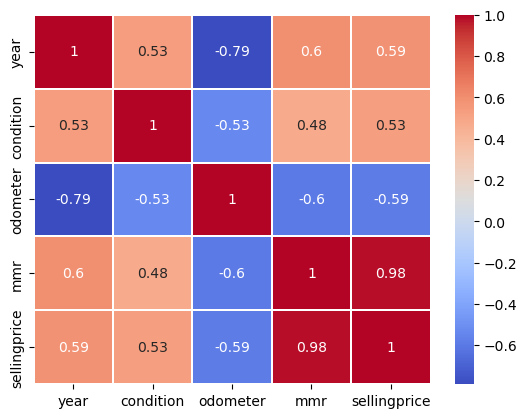

In [203]:
sns.heatmap(car_corr,cmap='coolwarm',linewidth=0.1,annot=True,linecolor='white')

In [204]:
car.isnull().sum()/car.shape[0]*100

year            0.0
make            0.0
model           0.0
trim            0.0
body            0.0
transmission    0.0
state           0.0
condition       0.0
odometer        0.0
color           0.0
interior        0.0
seller          0.0
mmr             0.0
sellingprice    0.0
saledate        0.0
dtype: float64

In [205]:
car.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
saledate         object
dtype: object

In [206]:
car['color'] = car['color'].replace(['-'],['tan'])


In [207]:
car['color'].value_counts()

black        131041
white        102066
gray          80315
silver        80145
blue          49069
red           41870
gold          10707
green         10667
beige          8770
burgundy       8595
brown          6516
orange         1945
purple         1481
off-white      1387
yellow         1201
charcoal        466
turquoise       220
pink             42
lime             15
Name: color, dtype: int64

In [208]:
#here instead of filling the null values with mode we fill it with random values
#car['color'] = car['color'].replace(['Tan'],np.random.choice(['Black','White','Silver','Gray','Blue','Red','Gold','Green','Burgundy','Beige','Brown','Orange','Purple','Off-White','Yellow','Charcoal','Turquoise','Pink','Lime']))

In [209]:
car['interior'].value_counts()

black        252808
gray         170769
beige         57340
tan           42080
brown          8255
red            1288
silver         1037
blue           1029
off-white       480
purple          326
gold            310
white           240
green           222
burgundy        182
orange          132
yellow           20
Name: interior, dtype: int64

In [210]:
#car

Text(-12.805555555555548, 0.5, 'Count')

<Figure size 2000x1000 with 0 Axes>

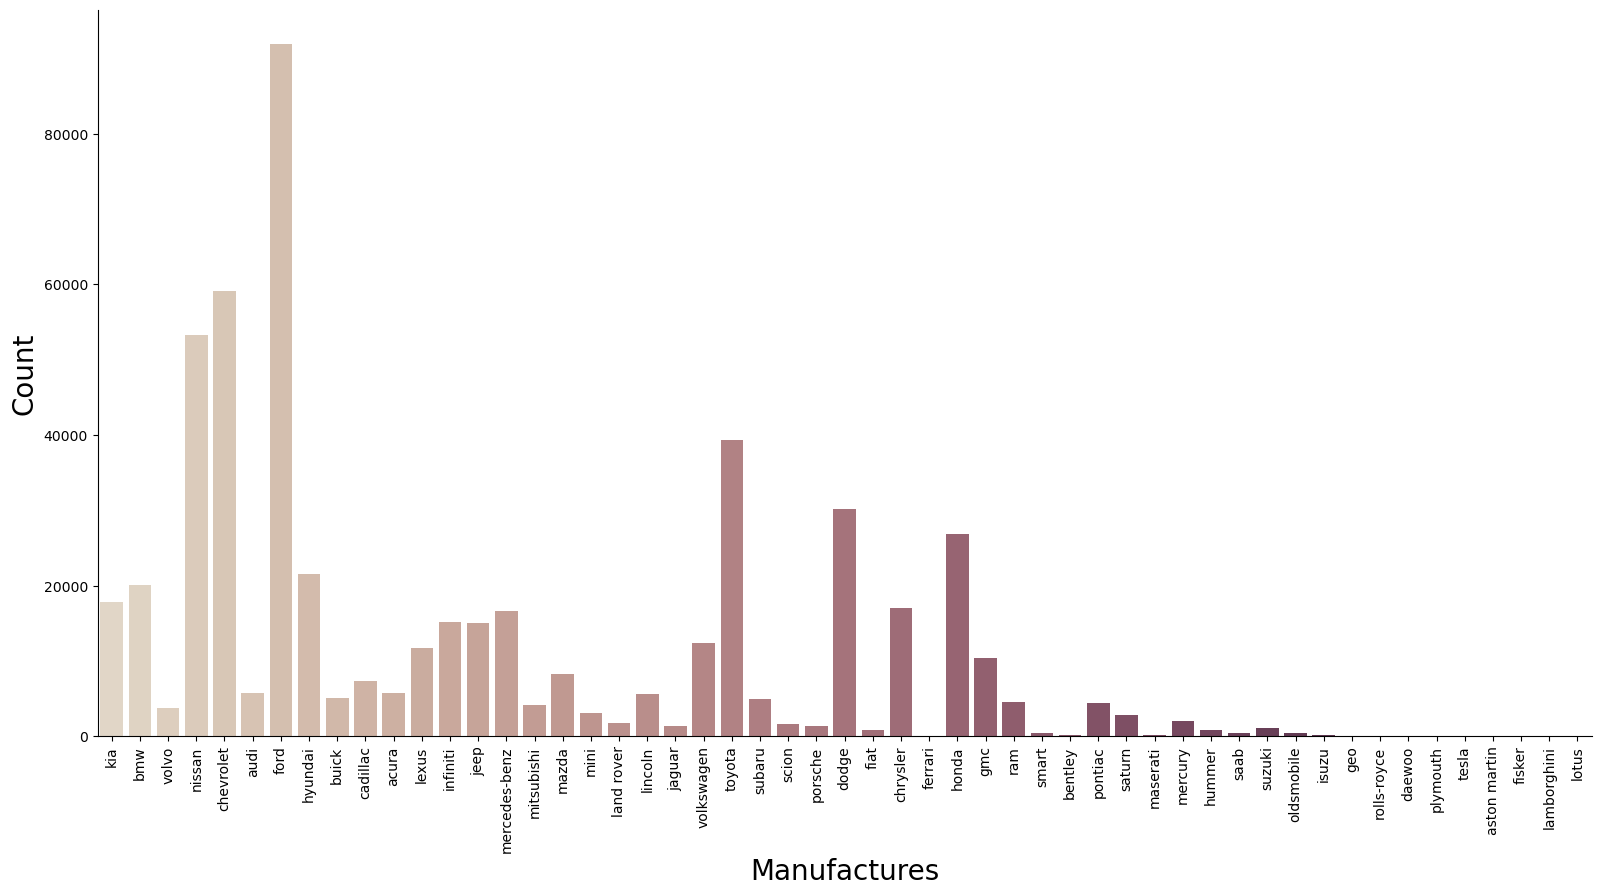

In [67]:
var = "make"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=car);
plt.xticks(rotation=90);
plt.xlabel('Manufactures', size=20)
plt.ylabel('Count', size=20)

Text(-21.68055555555555, 0.5, 'Count')

<Figure size 2000x1000 with 0 Axes>

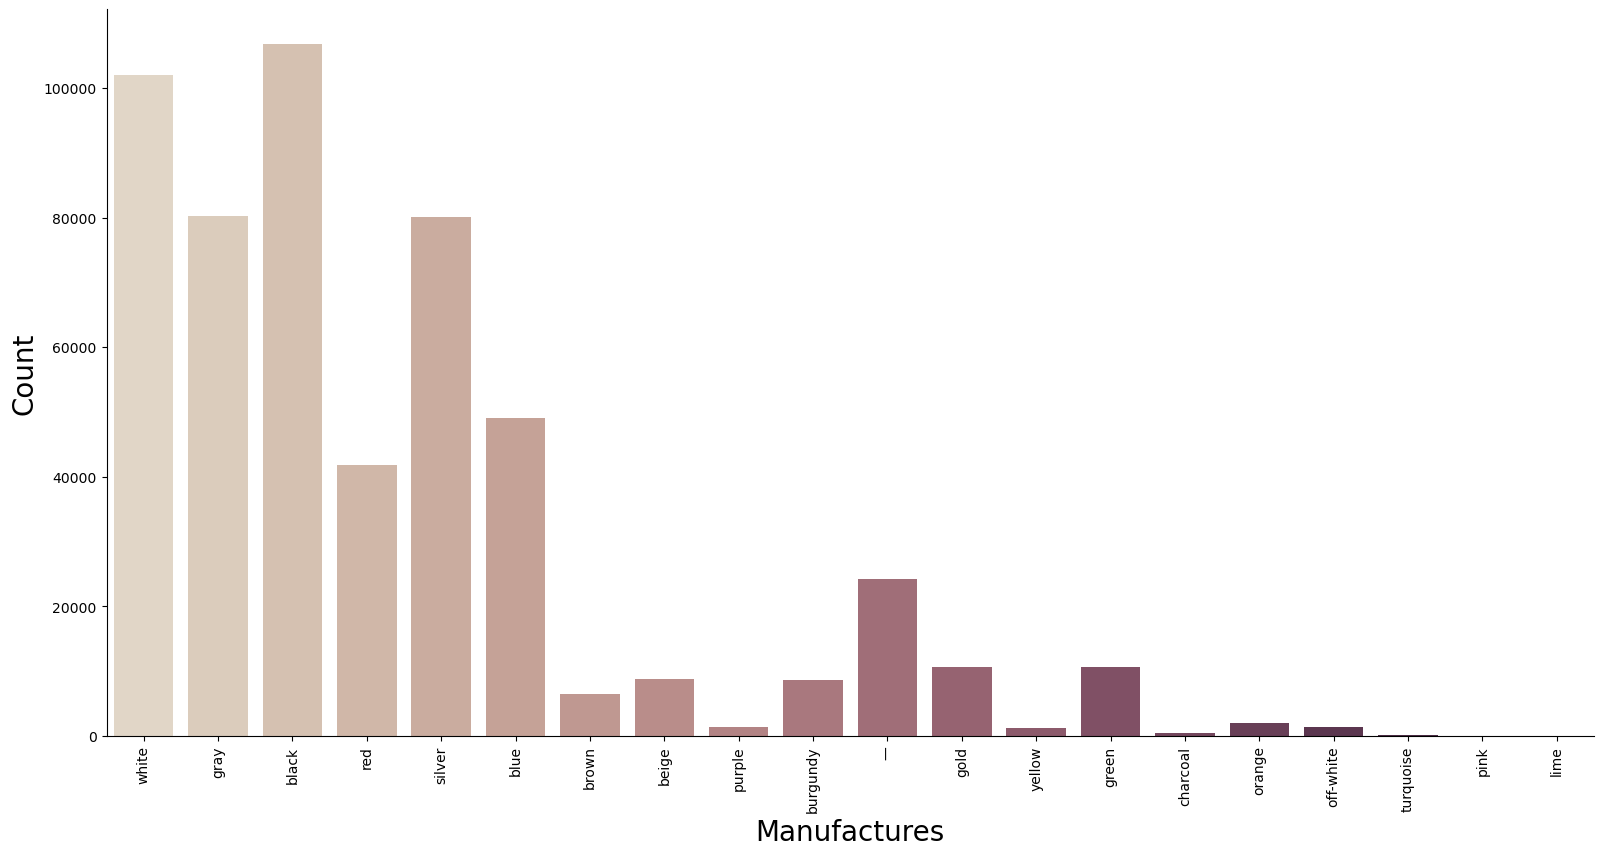

In [68]:
var = "color"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=car);
plt.xticks(rotation=90);
plt.xlabel('Manufactures', size=20)
plt.ylabel('Count', size=20)

Text(-21.68055555555555, 0.5, 'Count')

<Figure size 2000x1000 with 0 Axes>

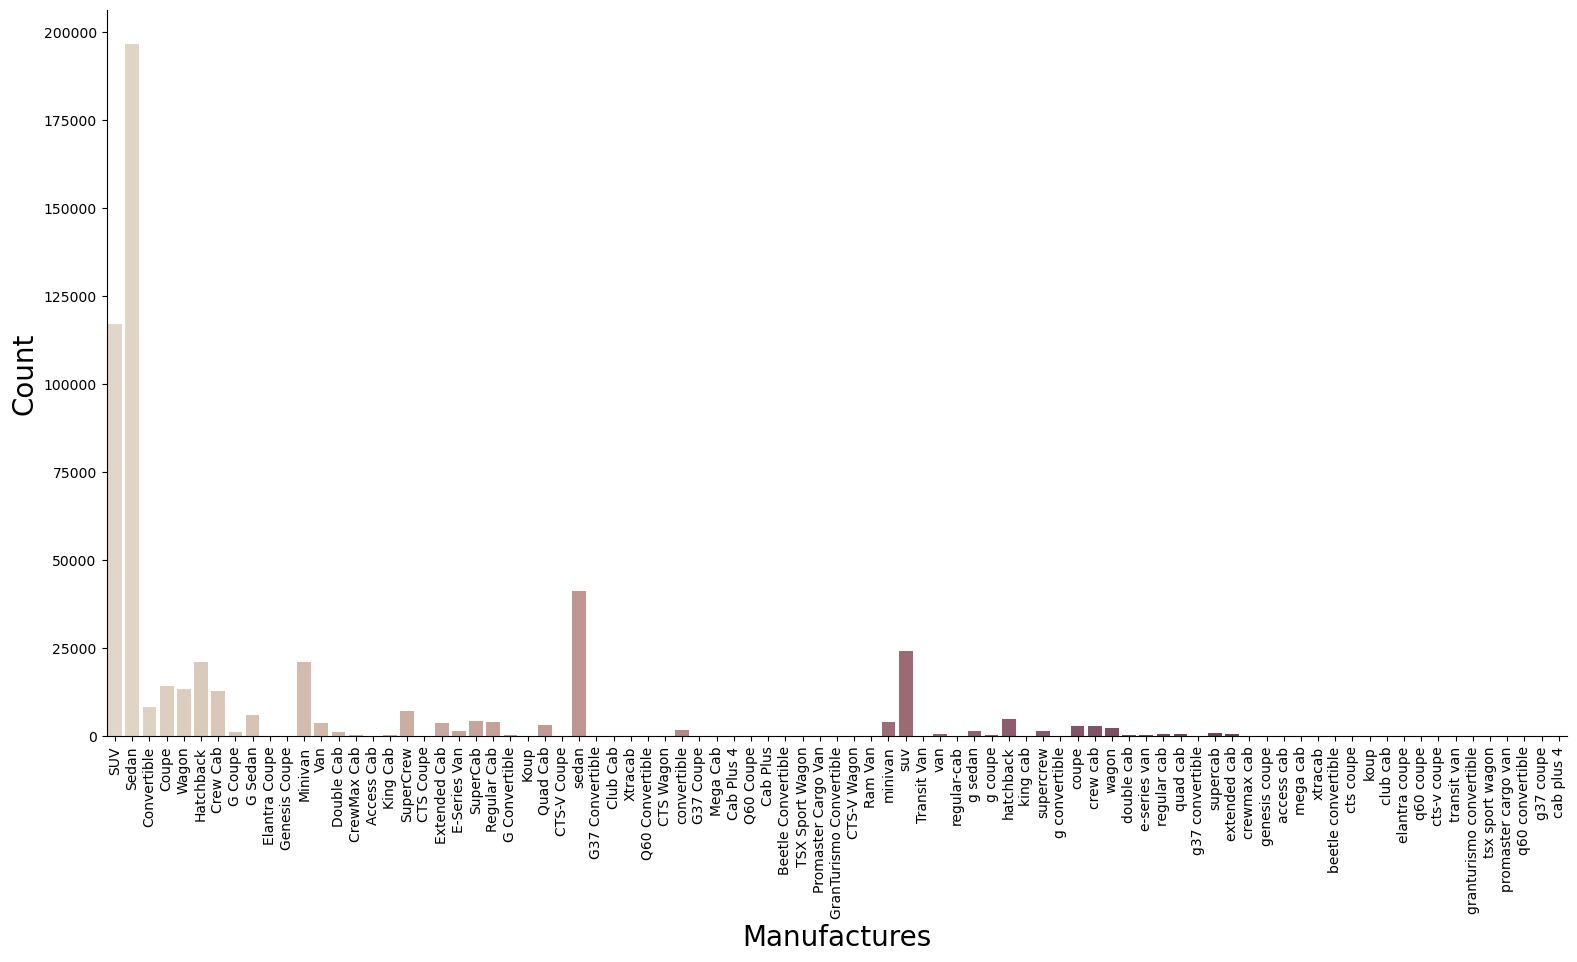

In [72]:
var = "body"
plt.figure(figsize=(20, 10))
sns.catplot(x=var, kind="count", palette="ch:.25", height=8, aspect=2, data=car);
plt.xticks(rotation=90);
plt.xlabel('Manufactures', size=20)
plt.ylabel('Count', size=20)

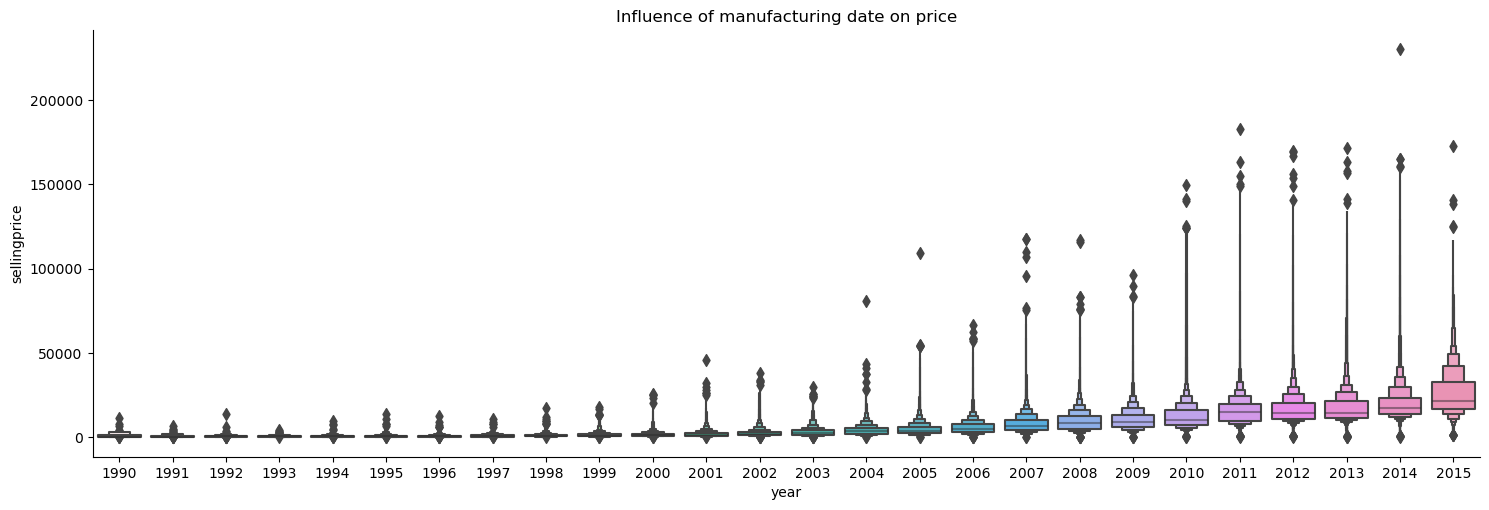

In [73]:
sns.catplot(x="year", y="sellingprice", kind="boxen", data=car, height=5, aspect=3).set(title="Influence of manufacturing date on price")

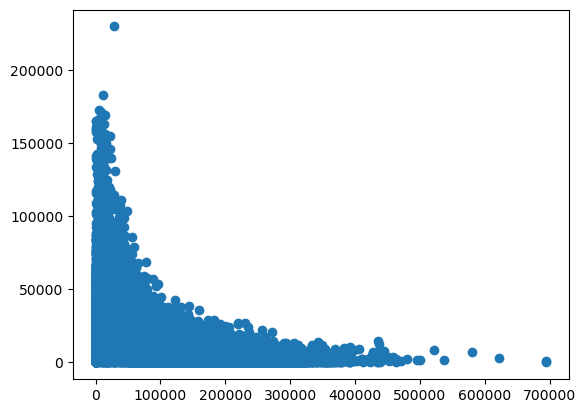

In [74]:
plt.scatter(x=car['odometer'],y=car['sellingprice'])

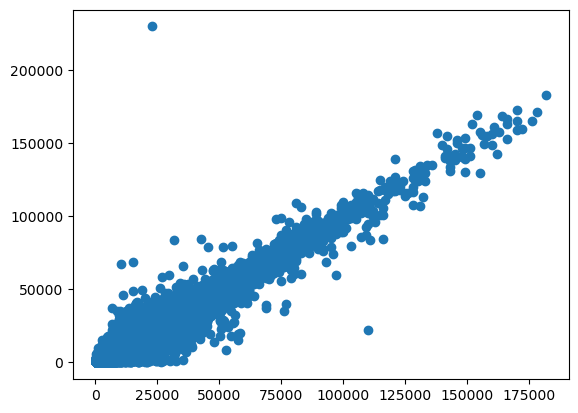

In [75]:
plt.scatter(x=car['mmr'],y=car['sellingprice'])

In [67]:
car['body'].unique()

array(['suv', 'sedan', 'convertible', 'coupe', 'wagon', 'hatchback',
       'crew cab', 'g coupe', 'g sedan', 'elantra coupe', 'genesis coupe',
       'minivan', 'van', 'double cab', 'crewmax cab', 'access cab',
       'king cab', 'supercrew', 'cts coupe', 'extended cab',
       'e-series van', 'supercab', 'regular cab', 'g convertible', 'koup',
       'quad cab', 'cts-v coupe', 'g37 convertible', 'club cab',
       'xtracab', 'q60 convertible', 'cts wagon', 'g37 coupe', 'mega cab',
       'cab plus 4', 'q60 coupe', 'cab plus', 'beetle convertible',
       'tsx sport wagon', 'promaster cargo van',
       'granturismo convertible', 'cts-v wagon', 'ram van', 'transit van',
       'regular-cab'], dtype=object)

In [134]:
#sns.pairplot(car)


### one hot encoding


In [116]:
#car['make'].value_counts()

In [117]:
#top_18=[x for x in car.make.value_counts().sort_values(ascending=False).head(18).index]
#top_18

In [119]:
#car['model'].unique().shape

In [120]:
#car_model=car['model'].value_counts()

In [121]:
#car_model.head(60)

In [122]:
#top_60=[x for x in car.model.value_counts().sort_values(ascending=False).head(60).index]
#top_60

In [123]:
#car_body=car['body'].value_counts()

In [124]:
#car_body

In [125]:
#top_25=[x for x in car.body.value_counts().sort_values(ascending=False).head(25).index]
#top_25

In [126]:
#car_trim=car['trim'].value_counts()

In [127]:
#car_trim.head(60)

In [128]:
#top_60_trim=[x for x in car.trim.value_counts().sort_values(ascending=False).head(60).index]
#top_60_trim

In [129]:
#car['seller'].value_counts()

In [130]:
#car['seller'].unique().shape

In [131]:
#car_seller=car['seller'].value_counts()

In [132]:
#car_seller.head(350)

In [133]:
#top_350=[x for x in car.seller.value_counts().sort_values(ascending=False).head(350).index]
#top_350

In [134]:
#car['seller'].value_counts()

In [135]:
#car['color'].value_counts()

In [136]:
#top_12=[x for x in car.color.value_counts().sort_values(ascending=False).head(12).index]
#top_12

In [137]:
#car['interior'].value_counts()

In [138]:
#top_8=[x for x in car.interior.value_counts().sort_values(ascending=False).head(8).index]
#top_8

In [139]:
#car['state'].value_counts()

In [140]:
#top_15=[x for x in car.state.value_counts().sort_values(ascending=False).head(15).index]
#top_15

In [284]:
# def one_hot_top_x(df,variable,top_x_labels):
#     #function to treat the dummy variable for the most frequent labels
#     #we can vary the number of most frequent labels that we encode
    
#     for label in top_x_labels:
#         df[variable+'_'+label]=np.where(df[variable]==label,1,0)

# one_hot_top_x(car,'make',top_18)





In [141]:
/#one_hot_top_x(car,'body',top_25)


In [142]:
#one_hot_top_x(car,'trim',top_60_trim)


In [143]:
#one_hot_top_x(car,'seller',top_350)


In [144]:
#one_hot_top_x(car,'model',top_60)

In [145]:
#one_hot_top_x(car,'color',top_12)

In [146]:
#one_hot_top_x(car,'interior',top_8)

In [147]:
#one_hot_top_x(car,'state',top_15)

In [293]:
#car['transmission'] = car['transmission'].replace(['automatic'],[1])
#car['transmission'] = car['transmission'].replace(['manual'],[0])


In [295]:
#car['transmission'].unique()

In [292]:
car=car.drop(['transmission'],axis=1)

In [211]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV,  cross_val_score
from sklearn import preprocessing, linear_model
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler 
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn import neighbors
from sklearn import tree

!pip install xgboost
import xgboost as xgb
from xgboost import plot_importance

!pip install lightgbm
from lightgbm import LGBMRegressor

In [105]:
#car1

In [106]:
X=car_price.drop("sellingprice",axis=1)
y=car_price['sellingprice']

In [107]:
car_price

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice
0,2015,24,645,885,39,0,3,5.0,16639.0,17,1,6987,21500
1,2015,24,645,885,39,0,3,5.0,9393.0,17,0,6987,21500
2,2014,4,10,257,36,0,3,4.5,1331.0,7,1,4814,30000
3,2015,52,590,1262,36,0,3,4.1,14282.0,17,1,13380,27750
4,2014,4,35,339,36,0,3,4.3,2641.0,7,1,4814,67000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,24,382,877,36,0,9,4.5,18255.0,15,1,1477,33000
558832,2012,41,8,956,7,0,36,5.0,54393.0,17,1,6271,30800
558833,2012,4,738,1410,39,0,3,4.8,50561.0,1,1,4814,34000
558834,2015,36,64,105,36,0,6,3.8,16658.0,17,1,4457,11100


In [263]:
car_price=car_price.drop('color',axis=1)

In [108]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)


In [109]:
# Let's check the shape of the train and test dataset

print(f'The shape of the train and test set for the independent variables are : X_train = {X_train.shape}, X_test = {X_test.shape}')
print(f'The shape of the train and test set for the dependent variables are : y_train = {y_train.shape}, y_test = {y_test.shape}')

The shape of the train and test set for the independent variables are : X_train = (429214, 12), X_test = (107304, 12)
The shape of the train and test set for the dependent variables are : y_train = (429214,), y_test = (107304,)


### RobustScaler

In [252]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    rob =RobustScaler()

    X_train = rob.fit_transform(X_train)
    X_test = rob.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    a, b = np.polyfit(y_pred, y_test, 1)
    plt.plot(y_pred, a*y_pred+b)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

R^2 is 0.4498902171034913
 Adj R^2 is 0.4498286898794487
 RMSE is: 7178.50743177967


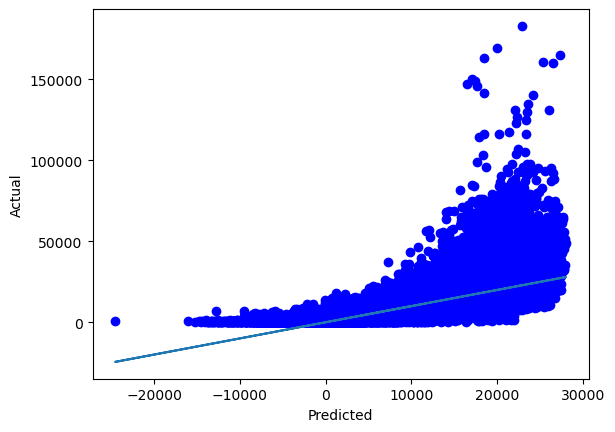

In [264]:
predict(LinearRegression(),X1,y1)

R^2 is 0.9058760394941593
 Adj R^2 is 0.9058655121663679
 RMSE is: 2969.3375245567063


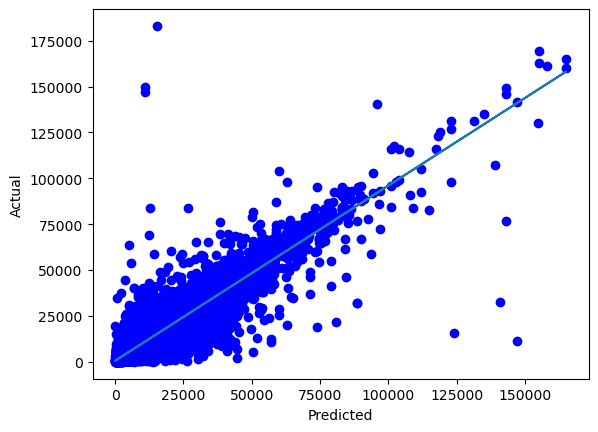

In [266]:
start=time.time()
predict(DecisionTreeRegressor(),X1,y1)
end=time.time()
train_time=end-start

In [267]:
train_time

9.47733187675476

R^2 is 0.9514052364279515
 Adj R^2 is 0.9513998013293611
 RMSE is: 2133.5567887018274


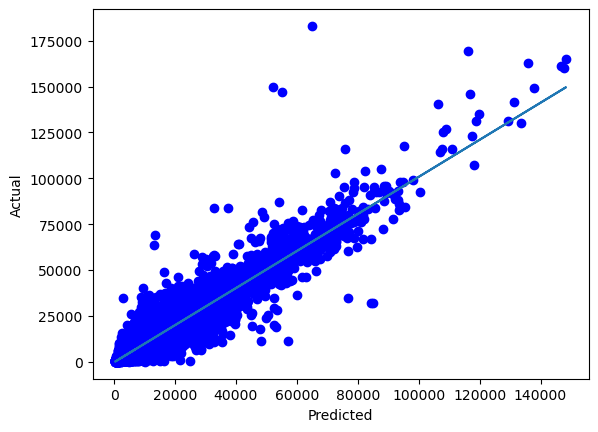

In [276]:
start=time.time()
predict_randomforestregregressor=predict(RandomForestRegressor(n_estimators=30),X1,y1)
end=time.time()
train_time=end-start

In [277]:
train_time

173.98148036003113

R^2 is 0.8982004212923286
 Adj R^2 is 0.8981890354822933
 RMSE is: 3088.03675284309


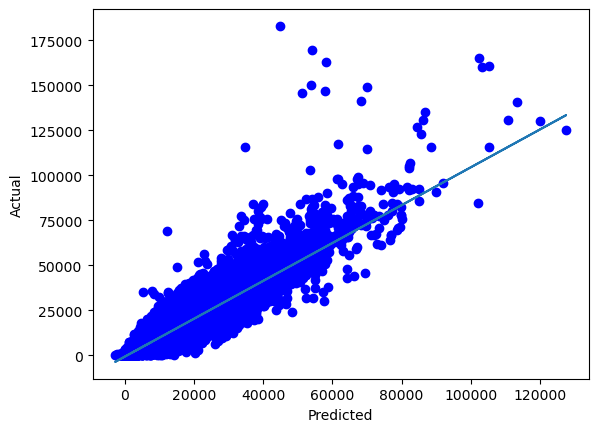

In [274]:
start=time.time()
predict(LGBMRegressor(),X1,y1)
end=time.time()
train_time=end-start

In [275]:
train_time

8.94426941871643

R^2 is 0.7244779486548496
 Adj R^2 is 0.7244471327931636
 RMSE is: 5080.280031418034


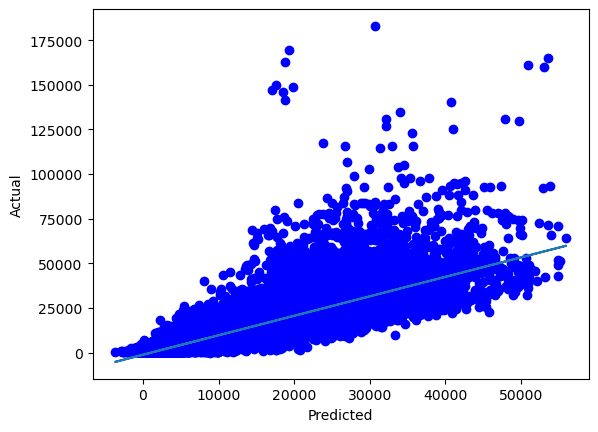

In [152]:
start=time.time()
predict(GradientBoostingRegressor(random_state=42,n_estimators=100),X1,y1)
end=time.time()
train_time=end-start

In [153]:
train_time

116.81616854667664

R^2 is 0.7840380456118313
 Adj R^2 is 0.7840138912703427
 RMSE is: 4497.778816661859


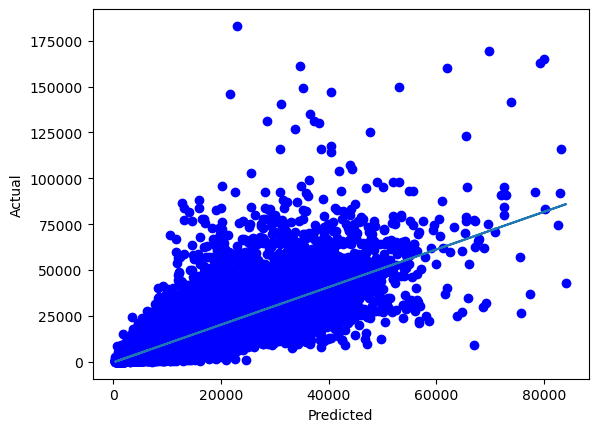

In [133]:
predict(neighbors.KNeighborsRegressor(n_neighbors=8),X1,y1)

R^2 is 0.9380688247884158
 Adj R^2 is 0.9380618980741291
 RMSE is: 2408.5969431199387


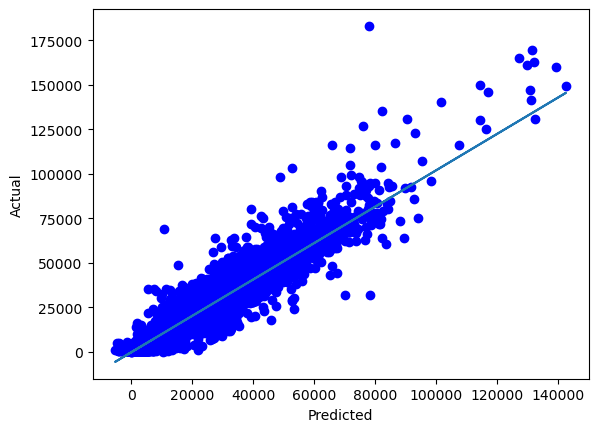

In [122]:
predict(xgb.XGBRegressor(),X1,y1)

In [127]:
from sklearn.ensemble import AdaBoostRegressor

R^2 is 0.42855910858602364
 Adj R^2 is 0.428495195576573
 RMSE is: 7316.361023853661


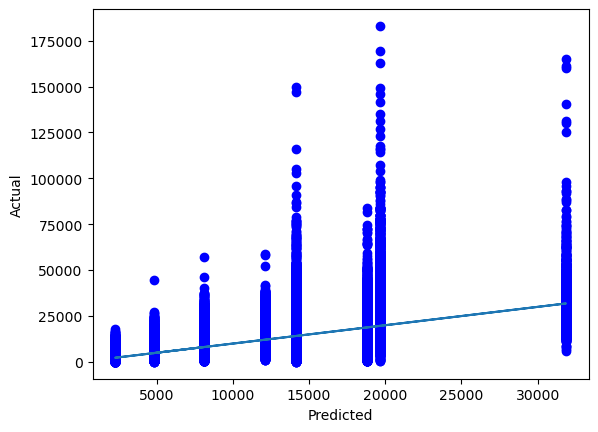

In [141]:
predict(AdaBoostRegressor(n_estimators=2),X1,y1)

In [ ]:
#predict(SVR(kernel='rbf'),X1,y1)

R^2 is -0.06872263195430528
 Adj R^2 is -0.06884216361663897
 RMSE is: 10005.573195292423


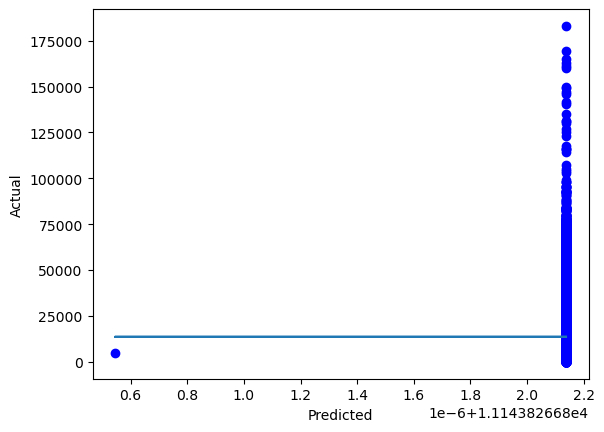

In [123]:
predict(MLPRegressor(activation='logistic', solver='sgd',learning_rate='adaptive',max_iter=1000,learning_rate_init=0.01,alpha=0.01),X1,y1)

R^2 is 0.9456726736502368
 Adj R^2 is 0.9456665973911266
 RMSE is: 2255.8937256563336


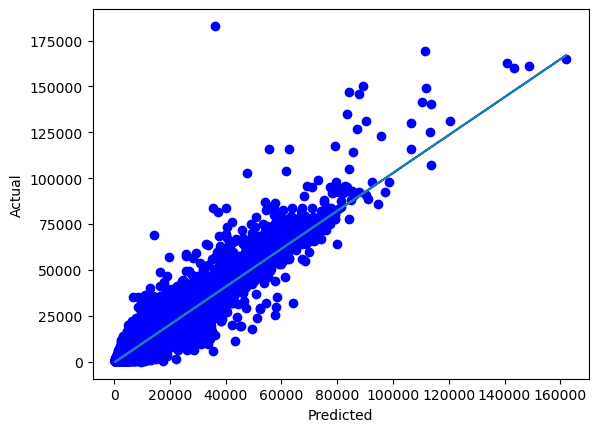

In [125]:
predict(ExtraTreesRegressor(n_estimators=50,random_state=42),X1,y1)

In [163]:
train_time


2.40714955329895

### MinMaxScaler

In [261]:
def predict_mm(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    mm =MinMaxScaler()

    X_train = mm.fit_transform(X_train)
    X_test = mm.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='g')
    a, b = np.polyfit(y_pred, y_test, 1)
    plt.plot(y_pred, a*y_pred+b)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)}\n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')
    

R^2 is 0.44928774629509327
 Adj R^2 is 0.44922615168748914
 RMSE is: 7182.437245277744


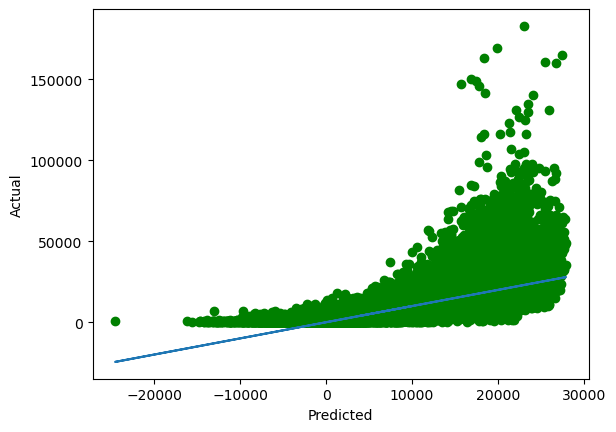

In [153]:
predict_mm(LinearRegression(),X1,y1)


R^2 is 0.902484239264564
 Adj R^2 is 0.9024733325796712
 RMSE is: 3022.364759233559


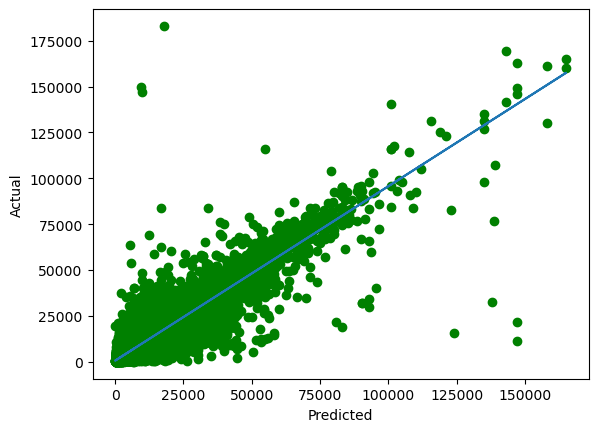

In [154]:
start=time.time()
predict_mm(DecisionTreeRegressor(),X1,y1)
end=time.time()
train_time=start-end

R^2 is 0.9518140539816764
 Adj R^2 is 0.9518086646074305
 RMSE is: 2124.5632506770803


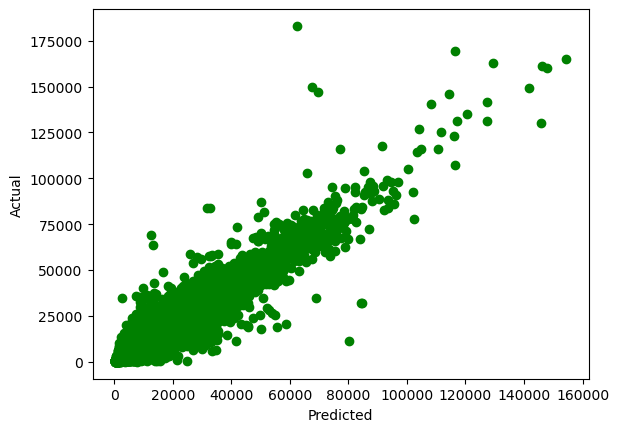

In [130]:
start=time.time()
predict_mm(RandomForestRegressor(n_estimators=50),X1,y1)
end=time.time()
train_time=end-start

In [133]:
train_time=end-start
train_time

162.54534006118774

R^2 is 0.8943221628829237
 Adj R^2 is 0.8943103433076992
 RMSE is: 3146.309403161973


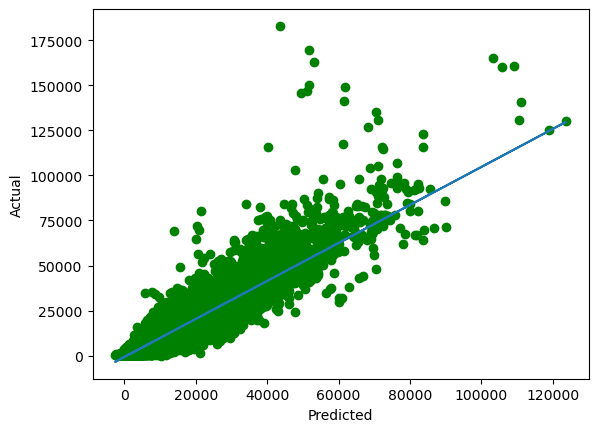

In [155]:
start=time.time()
predict_mm(LGBMRegressor(),X1,y1)
end=time.time()
train_time=end-start

R^2 is 0.9390097225101017
 Adj R^2 is 0.9390029010308548
 RMSE is: 2390.230450528382


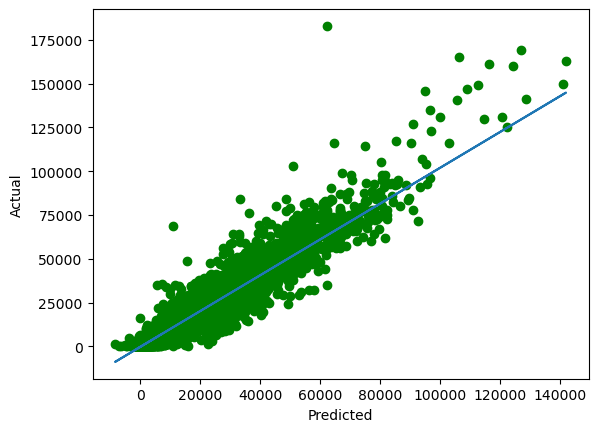

In [176]:
start=time.time()
predict_mm(xgb.XGBRegressor(),X1,y1)
end=time.time()
train_time=end-start

R^2 is 0.726291532736518
 Adj R^2 is 0.7262609197157879
 RMSE is: 5063.532321545096


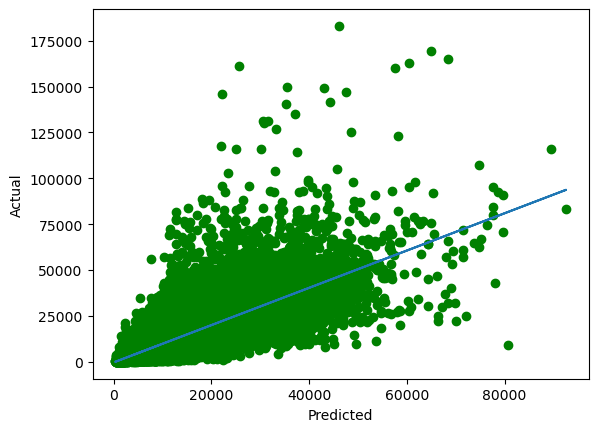

In [137]:
predict_mm(neighbors.KNeighborsRegressor(n_neighbors=6),X1,y1)

In [135]:
train_time

2.07175874710083

### StandardScaler

In [149]:
def predict_ss(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=10)
    ss =StandardScaler()

    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)

    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='r')
    a, b = np.polyfit(y_pred, y_test, 1)
    plt.plot(y_pred, a*y_pred+b)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    print(f'R^2 is {model.score(X_test,y_test)} \n Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}\n RMSE is: {mean_squared_error(y_test,y_pred,squared=False)}')

R^2 is 0.44928774629509316 
 Adj R^2 is 0.4492261516874889
 RMSE is: 7182.437245277745


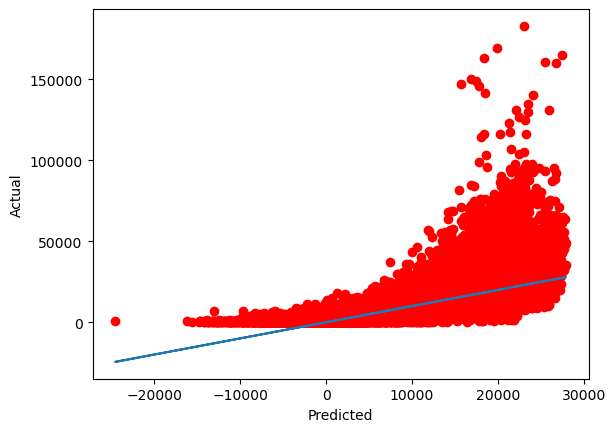

In [150]:
predict_ss(LinearRegression(),X1,y1)


R^2 is 0.8955908872042164 
 Adj R^2 is 0.8955792095299143
 RMSE is: 3127.3657305490774


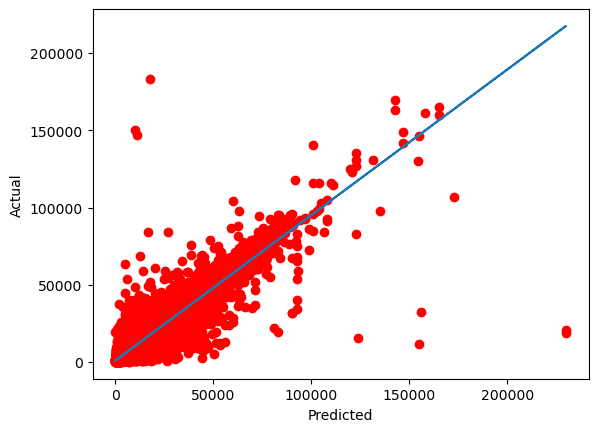

In [151]:
predict_ss(DecisionTreeRegressor(),X1,y1)


R^2 is 0.9524785145793419 
 Adj R^2 is 0.9524731995219274
 RMSE is: 2109.8640577166725


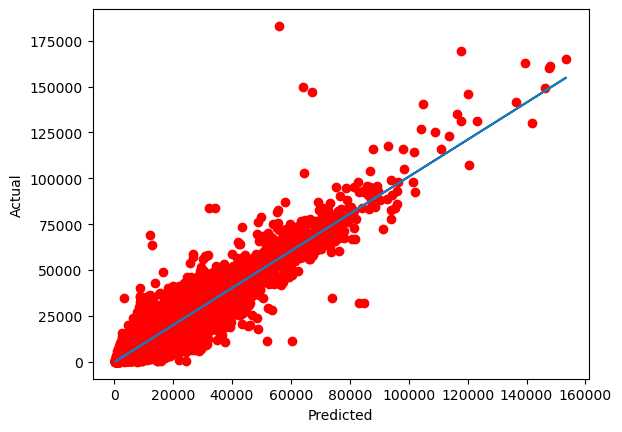

In [172]:
start=time.time()
predict_ss(RandomForestRegressor(n_estimators=50),X1,y1)
end=time.time()
train_time=end-start

R^2 is 0.8938862093921042 
 Adj R^2 is 0.8938743410575067
 RMSE is: 3152.792469534297


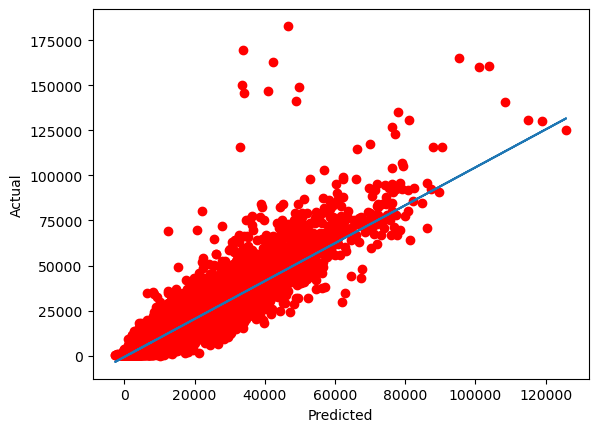

In [173]:
start=time.time()
predict_ss(LGBMRegressor(),X1,y1)
end=time.time()
train_time=end-start

R^2 is 0.9392666803841525 
 Adj R^2 is 0.9392598876444503
 RMSE is: 2385.1900011693106


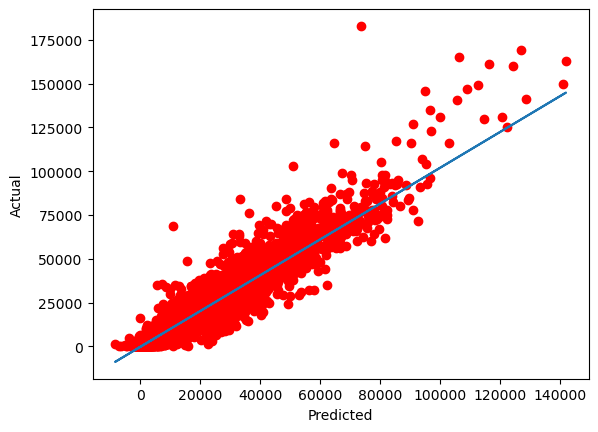

In [175]:
start=time.time()
predict_ss(xgb.XGBRegressor(),X1,y1)
end=time.time()
train_time=end-start

In [ ]:
car1['made_country']=car1['vin'].map(lambda x:x[:3])

In [ ]:
car1['made_country'].unique()

In [ ]:
car3=car1[car1['make'].isnull()]

In [ ]:
car3['made_country']=car3['vin'].map(lambda x:x[:3])

In [ ]:
car3['made_country'].value_counts()

In [ ]:
car4=car3[car3['made_country']=='1fm']

In [ ]:
car4

In [ ]:
def make(vin3):
    index=[]
    index=car3[car3['made_country']==vin3].index
    
    return index

In [ ]:
ind1=make('4a3')

In [ ]:
ind1

In [ ]:
car1.loc[ind1,'make']="mitsubishi"

In [212]:
car_price=car

In [213]:
car_price=car_price.drop(['mmr'],axis=1)

In [214]:
car_price

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice,saledate
0,2015,kia,sorento,lx,suv,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,sorento,lx,suv,automatic,ca,5.0,9393.0,white,beige,"kia motors america, inc",21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 series,328i sulev,sedan,automatic,ca,4.5,1331.0,gray,black,financial services remarketing (lease),30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,volvo,s60,t5,sedan,automatic,ca,4.1,14282.0,white,black,volvo na rep/world omni,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 series gran coupe,650i,sedan,automatic,ca,4.3,2641.0,gray,black,financial services remarketing (lease),67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,kia,k900,luxury,sedan,automatic,in,4.5,18255.0,silver,black,avis corporation,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558832,2012,ram,2500,power wagon,crew cab,automatic,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558833,2012,bmw,x5,xdrive35d,suv,automatic,ca,4.8,50561.0,black,black,financial services remarketing (lease),34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558834,2015,nissan,altima,2.5 s,sedan,automatic,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [215]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(car['make'])

LabelEncoder()

In [216]:
le.classes_

array(['acura', 'aston martin', 'audi', 'bentley', 'bmw', 'buick',
       'cadillac', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'ferrari',
       'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer',
       'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia',
       'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus',
       'maserati', 'mazda', 'mercedes-benz', 'mercury', 'mini',
       'mitsubishi', 'nissan', 'oldsmobile', 'plymouth', 'pontiac',
       'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion',
       'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen',
       'volvo'], dtype=object)

In [217]:
le.transform(car['make'])

array([24, 24,  4, ...,  4, 36, 14])

In [218]:
car_price['make']=le.transform(car['make'])

In [219]:
le.transform(car['make'])

array([24, 24,  4, ...,  4, 36, 14])

In [220]:
le.fit(car['model'])

LabelEncoder()

In [221]:
le.classes_

array(['09-mar', '09-may', '1 series', '1500', '190-class', '2 series',
       '200', '200sx', '2500', '3', '3 series', '3 series gran turismo',
       '300', '300-class', '3000gt', '300m', '300zx', '3500', '350z',
       '360', '370z', '4 series', '4 series gran coupe', '400-class',
       '420-class', '458 italia', '4runner', '5 series',
       '5 series gran turismo', '500', '500-class', '500e', '500l', '6',
       '6 series', '6 series gran coupe', '626', '7 series', '8 series',
       '850', '9-2x', '9-7x', '911', '940', '960', 'a3', 'a4', 'a5', 'a6',
       'a7', 'a8', 'acadia', 'accent', 'accord', 'accord crosstour',
       'accord hybrid', 'achieva', 'activehybrid 5', 'activehybrid 7',
       'activehybrid x6', 'aerio', 'alero', 'allroad', 'allroad quattro',
       'altima', 'altima hybrid', 'amanti', 'amigo', 'armada', 'ascender',
       'aspen', 'aspire', 'astra', 'astro', 'astro cargo', 'ats', 'aura',
       'aura hybrid', 'aurora', 'avalanche', 'avalon', 'avalon hybrid',
  

In [222]:
le.transform(car['model'])

array([645, 645,  10, ..., 738,  64, 260])

In [223]:
car_price['model']=le.transform(car['model'])

In [224]:
le.fit(car['trim'])

LabelEncoder()

In [225]:
le.transform(car['trim'])

array([ 885,  885,  257, ..., 1410,  105, 1452])

In [226]:
car_price['trim']=le.transform(car['trim'])

In [227]:
le.fit(car['body'])

LabelEncoder()

In [228]:
le.transform(car['body'])

array([39, 39, 36, ..., 39, 36, 38])

In [229]:
car_price['body']=le.transform(car['body'])

In [230]:
le.fit(car['color'])

LabelEncoder()

In [231]:
le.transform(car['color'])

array([17, 17,  7, ...,  1, 17,  7])

In [232]:
car_price['color']=le.transform(car['color'])

In [233]:
le.fit(car['interior'])

LabelEncoder()

In [234]:
le.transform(car['interior'])

array([1, 0, 1, ..., 1, 1, 6])

In [235]:
car_price['interior']=le.transform(car['interior'])

In [236]:
le.fit(car['transmission'])

LabelEncoder()

In [237]:
le.transform(car['transmission'])

array([0, 0, 0, ..., 0, 0, 0])

In [238]:
car_price['transmission']=le.transform(car['transmission'])

In [239]:
le.fit(car['seller'])

LabelEncoder()

In [240]:
le.transform(car['seller'])

array([6987, 6987, 4814, ..., 4814, 4457, 5094])

In [241]:
car_price['seller']=le.transform(car['seller'])

In [242]:
le.fit(car['state'])

LabelEncoder()

In [243]:
le.transform(car['state'])

array([3, 3, 3, ..., 3, 6, 3])

In [244]:
car_price['state']=le.transform(car['state'])

In [245]:
car_price=car_price.drop(['saledate'],axis=1)

In [246]:
car_price

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,sellingprice
0,2015,24,645,885,39,0,3,5.0,16639.0,17,1,6987,21500
1,2015,24,645,885,39,0,3,5.0,9393.0,17,0,6987,21500
2,2014,4,10,257,36,0,3,4.5,1331.0,7,1,4814,30000
3,2015,52,590,1262,36,0,3,4.1,14282.0,17,1,13380,27750
4,2014,4,35,339,36,0,3,4.3,2641.0,7,1,4814,67000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558831,2015,24,382,877,36,0,9,4.5,18255.0,15,1,1477,33000
558832,2012,41,8,956,7,0,36,5.0,54393.0,17,1,6271,30800
558833,2012,4,738,1410,39,0,3,4.8,50561.0,1,1,4814,34000
558834,2015,36,64,105,36,0,6,3.8,16658.0,17,1,4457,11100


In [247]:
from sklearn import feature_selection
X1=car_price.drop("sellingprice",axis=1)
y1=car_price['sellingprice']
feature=feature_selection.f_classif(X1,y1)

In [248]:
feature

(array([573.85224515,   5.55801729,   4.02481343,   5.02580659,
          7.74811298,   3.08054254,   4.19940974, 192.39230972,
        403.15528409,   1.69448162,   9.59908543,   4.26095968]),
 array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 2.77994132e-69, 0.00000000e+00, 0.00000000e+00]))

In [249]:
p_values=pd.Series(feature[0])
p_values.index=X1.columns
p_values

year            573.852245
make              5.558017
model             4.024813
trim              5.025807
body              7.748113
transmission      3.080543
state             4.199410
condition       192.392310
odometer        403.155284
color             1.694482
interior          9.599085
seller            4.260960
dtype: float64

In [250]:
import time
start=time.time()

In [251]:
start

1677780371.6459575

In [142]:
import lightgbm
import time
from math import sqrt
from sklearn import preprocessing, model_selection, metrics
from sklearn.metrics import mean_squared_error

In [149]:
models = [
           ['LinearRegression: ',              LinearRegression()],
           ['Lasso: ',                         Lasso()],
           ['Ridge: ',                         Ridge()],
           ['DecisionTree ',                   DecisionTreeRegressor(random_state=42)],
           ['RandomForest ',                   RandomForestRegressor(n_estimators=50,random_state=42)],
           ['ExtraTreeRegressor :',            ExtraTreesRegressor(n_estimators=50,random_state=42)],
           ['GradientBoostingRegressor: ',     GradientBoostingRegressor(random_state=42)],
           ['XGBRegressor: ',                  xgb.XGBRegressor(random_state=42)] ,
           ['Light-GBM: ',                     lightgbm.LGBMRegressor(num_leaves=41, n_estimators=50,random_state=42)],
]


In [150]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    start = time.time()
    curr_model.fit(X_train,y_train)
    end = time.time()
    curr_model_data["Train_Time"] = end - start
    curr_model_data["Train_R2_Score"] = metrics.r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["Test_R2_Score"] = metrics.r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["Test_RMSE_Score"] = sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

In [151]:
model_data

[{'Name': 'LinearRegression: ',
  'Train_Time': 0.23606348037719727,
  'Train_R2_Score': 0.4526218089880676,
  'Test_R2_Score': 0.4545475857540905,
  'Test_RMSE_Score': 7108.678621869353},
 {'Name': 'Lasso: ',
  'Train_Time': 0.504387617111206,
  'Train_R2_Score': 0.4526214237198696,
  'Test_R2_Score': 0.4545440202515567,
  'Test_RMSE_Score': 7108.701855766167},
 {'Name': 'Ridge: ',
  'Train_Time': 0.12548327445983887,
  'Train_R2_Score': 0.45262180898396087,
  'Test_R2_Score': 0.45454757642669663,
  'Test_RMSE_Score': 7108.678682649583},
 {'Name': 'DecisionTree ',
  'Train_Time': 5.860574007034302,
  'Train_R2_Score': 1.0,
  'Test_R2_Score': 0.9103848214527491,
  'Test_RMSE_Score': 2881.3846191191533},
 {'Name': 'RandomForest ',
  'Train_Time': 184.33184456825256,
  'Train_R2_Score': 0.9935022748743161,
  'Test_R2_Score': 0.9559876508382499,
  'Test_RMSE_Score': 2019.285474342035},
 {'Name': 'ExtraTreeRegressor :',
  'Train_Time': 124.92756581306458,
  'Train_R2_Score': 0.999999905856

In [113]:
gbr = GradientBoostingRegressor()
gbr_params = {
    "n_estimators":[150,200,500],
    "max_depth":[2,4,6],
    "learning_rate":[0.01,0.1,1],
    "loss": ['squared_error','huber','quantile'],
}

In [114]:
rdmsearch=RandomizedSearchCV(gbr, gbr_params,cv=3,n_jobs=-1) 
rdmsearch.fit(X,y)
ht_params=rdmsearch.best_params_
ht_score=rdmsearch.best_score_
ht_params
ht_score

0.9221497774998259

In [115]:
ht_params

{'n_estimators': 500, 'max_depth': 6, 'loss': 'huber', 'learning_rate': 0.1}

R^2 is 0.9222354796074751
 Adj R^2 is 0.9222267820070733
 RMSE is: 2698.9834351713243


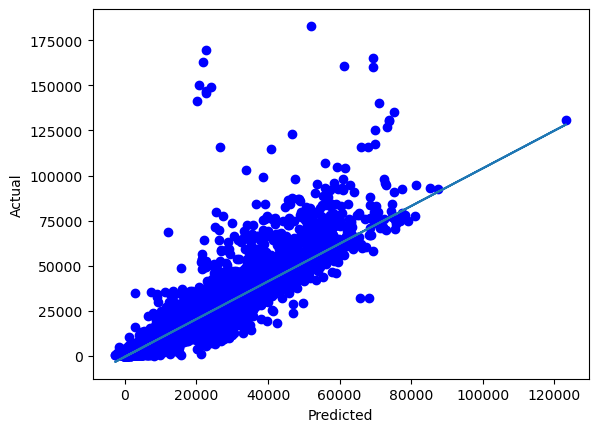

In [260]:
start=time.time()
predict(GradientBoostingRegressor(random_state=42,n_estimators=500,max_depth=6,loss='huber'),X1,y1)
end=time.time()
train_time=end-start

In [262]:
train_time

1261.5408141613007